Analyze the Netflix catalog to understand global content trends — focusing on types, genres, release patterns, and audience ratings — to help Netflix make data-driven content strategy decisions

In [104]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [105]:
#Load the data
df=pd.read_csv('../Data/netflix_titles.csv')

In [106]:
#explore the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [107]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(8807, 12)

<Axes: >

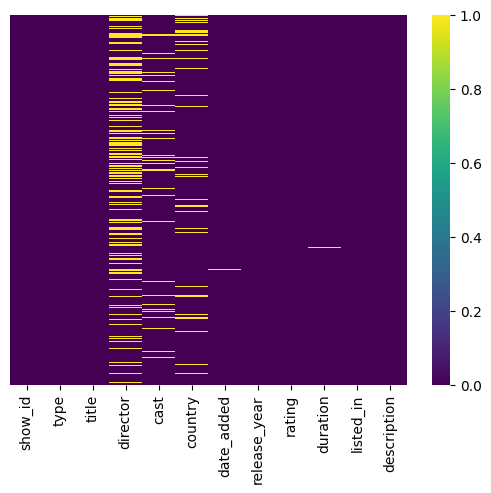

In [108]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [109]:
#Data Cleaning
#percentage of missing values
df.isnull().sum()/len(df)*100





show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [110]:
#missing values imputation 
df.dropna(subset=['rating','duration','date_added'],inplace=True) 
df['director']=df['director'].fillna('Not Available')
df[['cast','country']]=df[['cast','country']].fillna('Unknown')

In [111]:
df.isnull().sum()/len(df)*100


show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [112]:
#fixing datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [113]:
df['duration'].unique().sum()
#so their is many unique valuus with same meaning so here we need to standardrise it 

'90 min2 Seasons1 Season91 min125 min9 Seasons104 min127 min4 Seasons67 min94 min5 Seasons161 min61 min166 min147 min103 min97 min106 min111 min3 Seasons110 min105 min96 min124 min116 min98 min23 min115 min122 min99 min88 min100 min6 Seasons102 min93 min95 min85 min83 min113 min13 min182 min48 min145 min87 min92 min80 min117 min128 min119 min143 min114 min118 min108 min63 min121 min142 min154 min120 min82 min109 min101 min86 min229 min76 min89 min156 min112 min107 min129 min135 min136 min165 min150 min133 min70 min84 min140 min78 min7 Seasons64 min59 min139 min69 min148 min189 min141 min130 min138 min81 min132 min10 Seasons123 min65 min68 min66 min62 min74 min131 min39 min46 min38 min8 Seasons17 Seasons126 min155 min159 min137 min12 min273 min36 min34 min77 min60 min49 min58 min72 min204 min212 min25 min73 min29 min47 min32 min35 min71 min149 min33 min15 min54 min224 min162 min37 min75 min79 min55 min158 min164 min173 min181 min185 min21 min24 min51 min151 min42 min22 min134 min177 min

In [114]:
#fixing datatypes
df['duration']=(
    df['duration'].str.lower().str.strip()
    .str.replace(r'\s+',' ', regex=True)
    .str.replace(r'mins|minutes|min','min', regex=True)
)
df['duration'].unique().sum()


'90 min2 seasons1 season91 min125 min9 seasons104 min127 min4 seasons67 min94 min5 seasons161 min61 min166 min147 min103 min97 min106 min111 min3 seasons110 min105 min96 min124 min116 min98 min23 min115 min122 min99 min88 min100 min6 seasons102 min93 min95 min85 min83 min113 min13 min182 min48 min145 min87 min92 min80 min117 min128 min119 min143 min114 min118 min108 min63 min121 min142 min154 min120 min82 min109 min101 min86 min229 min76 min89 min156 min112 min107 min129 min135 min136 min165 min150 min133 min70 min84 min140 min78 min7 seasons64 min59 min139 min69 min148 min189 min141 min130 min138 min81 min132 min10 seasons123 min65 min68 min66 min62 min74 min131 min39 min46 min38 min8 seasons17 seasons126 min155 min159 min137 min12 min273 min36 min34 min77 min60 min49 min58 min72 min204 min212 min25 min73 min29 min47 min32 min35 min71 min149 min33 min15 min54 min224 min162 min37 min75 min79 min55 min158 min164 min173 min181 min185 min21 min24 min51 min151 min42 min22 min134 min177 min

In [115]:

# df[['date_added','release_year']]=df[['date_added','release_year']].apply(lambda x:x.strip())
df['date_added']=df['date_added'].str.strip()
df['date_added']=pd.to_datetime(df['date_added'])


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [117]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Available,Unknown,Unknown,2021-09-24,2021,TV-MA,1 season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


np.int64(2021)

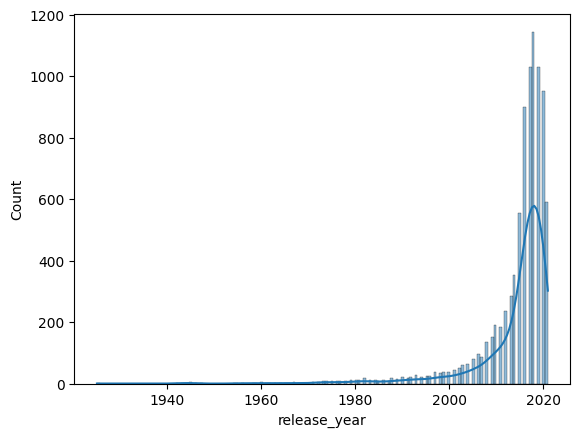

In [118]:
#check if there is any outlier in release year  column 
sns.histplot(df['release_year'], kde=True)
df['release_year'].max()

#there is no outlier okay to go ahead 

In [119]:
df.shape[1]

12

<Axes: xlabel='release_year'>

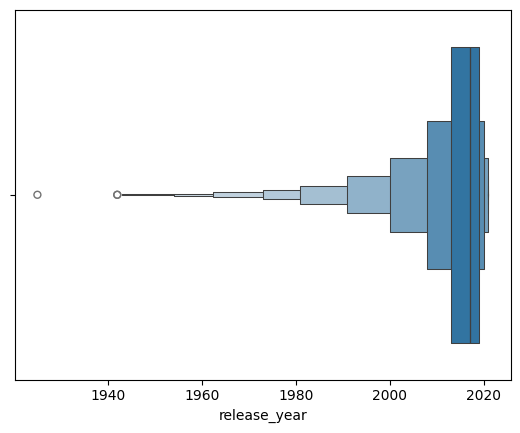

In [120]:
sns.boxenplot(x=df['release_year'])# checking any outlier if any in theparticular column


Visualisations 

Text(0.5, 1.0, 'Proportion of Movies vs. TV Shows on Netflix')

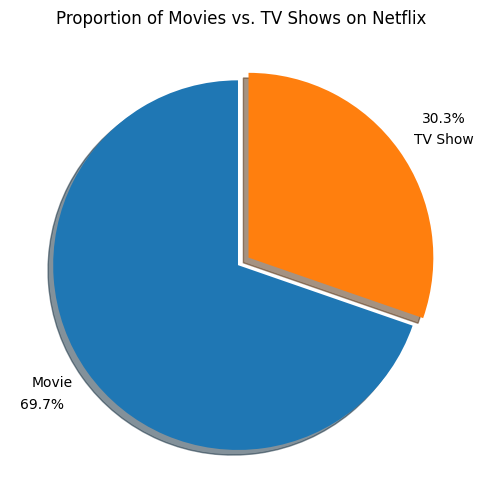

In [121]:
#portion of movies vs TV shows
counts=df['type'].value_counts()
counts
plt.figure(figsize=(6,6))
plt.pie(counts.values,labels=counts.index,autopct='%1.1f%%',startangle=90,pctdistance=1.3,explode=[0.02,0.05],shadow=True)
plt.title('Proportion of Movies vs. TV Shows on Netflix')

Text(0, 0.5, 'Content Count')

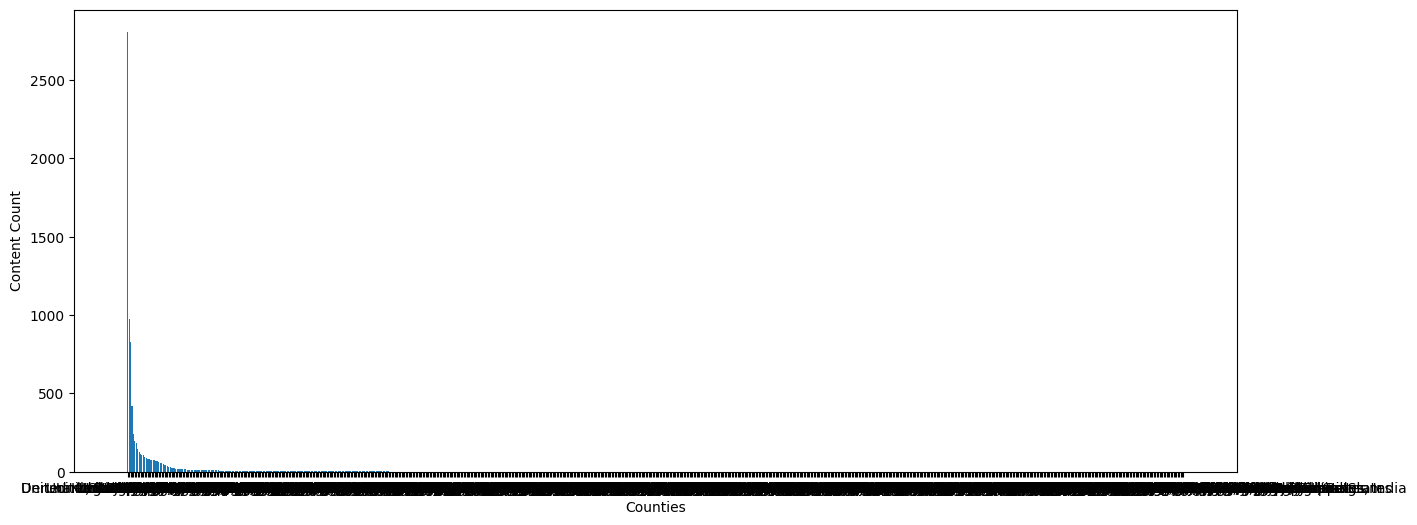

In [122]:
#Which countries produce the most content on the platform?



countries=df['country'].value_counts()
x=countries.index
y=countries.values
plt.figure(figsize=(15,6))
plt.bar(x,y)
plt.xlabel('Counties')
plt.ylabel('Content Count')

In [123]:
# its huge mess so what we can do i create afunction that labels countries with less than 100 contetn as others that will reduce size 
def group_rare_catagories(series,threshold=100,other_labels='Others'):
    counts=series.value_counts()
    return series.apply(lambda x: x if counts[x]>=threshold else other_labels)

countries=group_rare_catagories(df['country'])

C:\Users\prans\AppData\Local\Temp\ipykernel_23264\1195286187.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=countries,palette="Spectral")#using sea born for better look


<Axes: title={'center': 'Countires Producing highest Content per year'}, xlabel='Content', ylabel='Countries'>

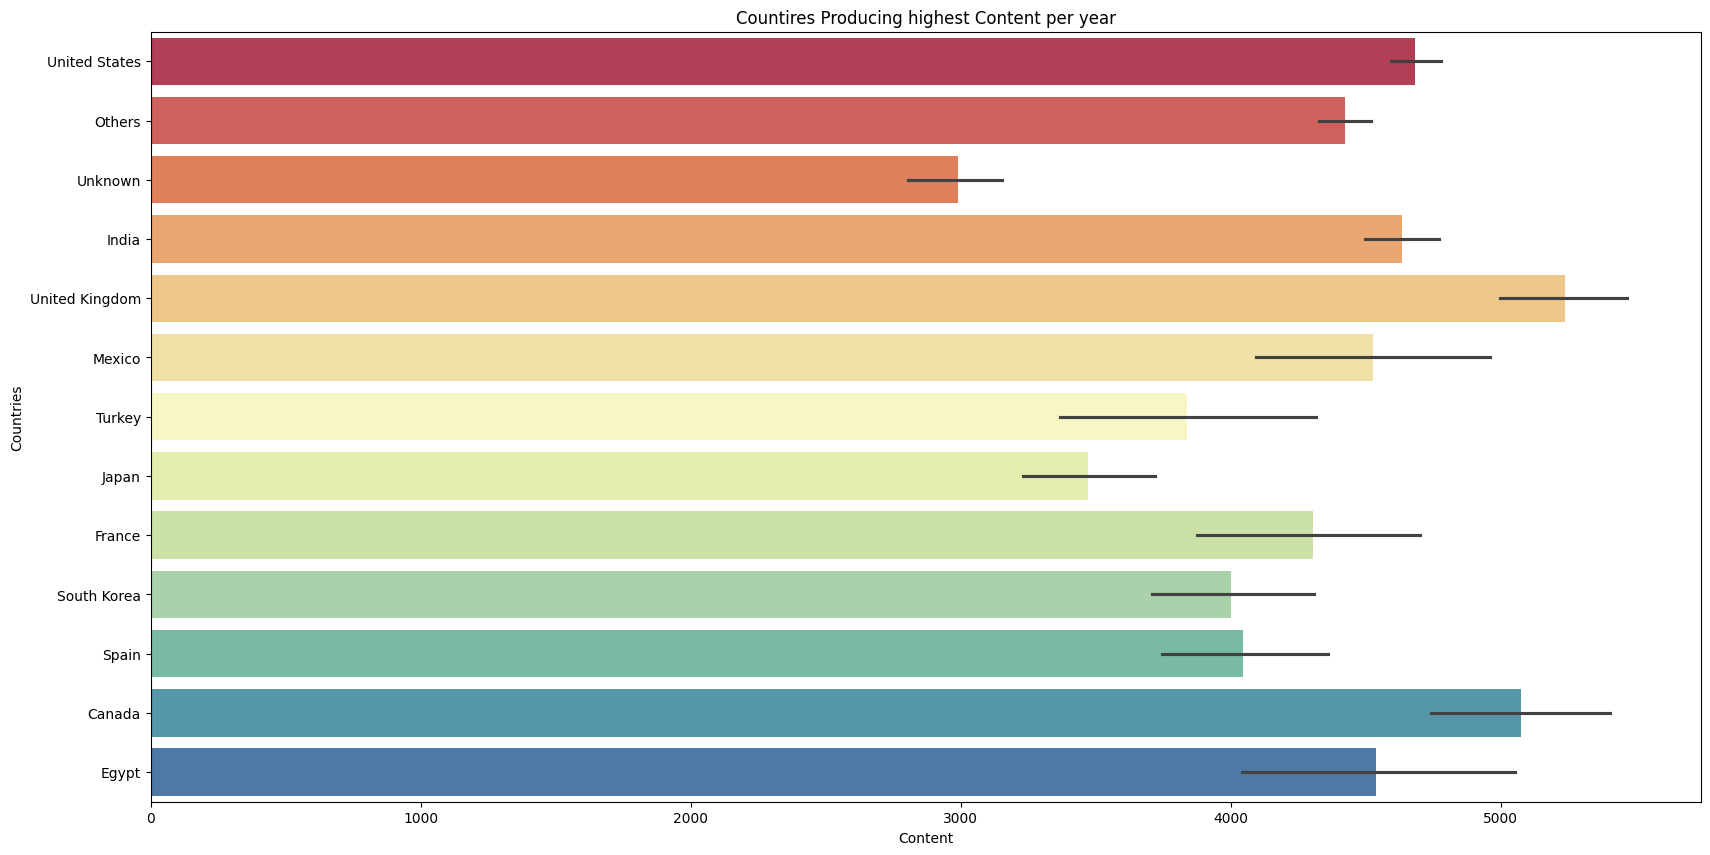

In [124]:
# now plot again
from numpy.ma import count


plt.figure(figsize=(20,10))
plt.title('Countires Producing highest Content per year')
plt.xlabel('Content')
plt.ylabel('Countries')
# plt.bar(countries.values,countries.index,align='center',width=0.5,lw=6)
sns.barplot(data=countries,palette="Spectral")#using sea born for better look

Temporal Analysis
# How Netflix contents has grown over the year 

In [128]:
#How has Netflix’s content library grown over the years (based on release_year or date_added)?
year_added=df['date_added'].dt.year
content_rel_year=year_added.value_counts().sort_values()
content_rel_year

date_added
2010       1
2009       2
2008       2
2012       3
2013      11
2011      13
2014      24
2015      82
2016     426
2017    1185
2021    1498
2018    1648
2020    1879
2019    2016
Name: count, dtype: int64

<Axes: title={'center': 'Content Realease per year'}, xlabel='Release Year', ylabel='No. of Content'>

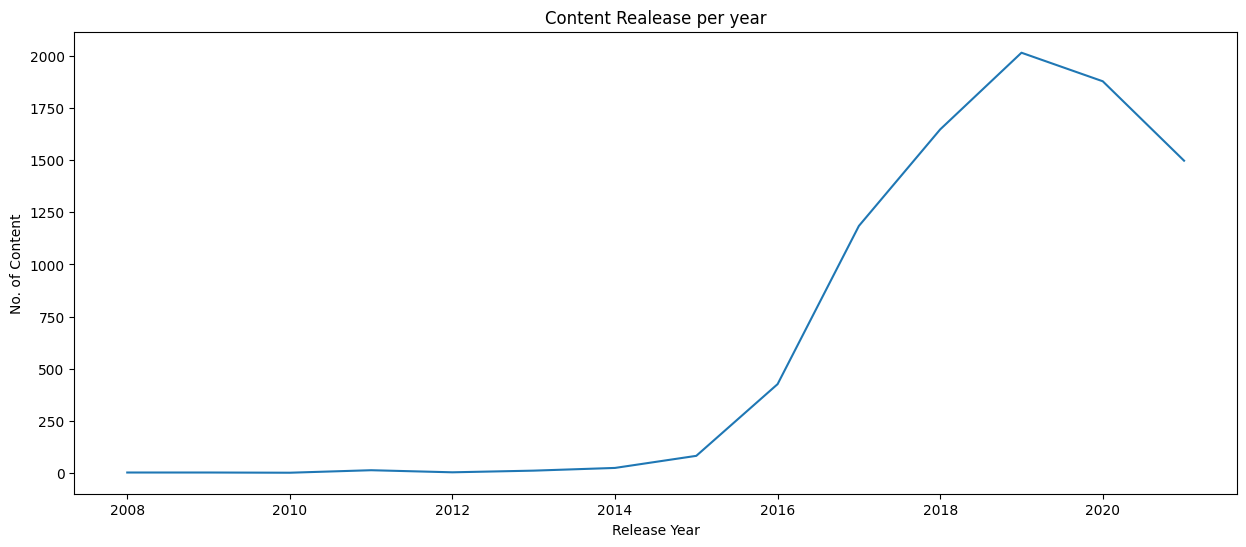

In [151]:
plt.figure(figsize=(15,6))
plt.title('Content Realease per year')
plt.xlabel('Release Year') 
plt.ylabel('No. of Content')
# plt.plot(content_rel_year.index,content_rel_year.values)
sns.lineplot(content_rel_year,markers=True)

In [127]:
# from 2016 to 2019 which month wise plot like which month has higest release 